### Convite para região com maior número de Médicos ativos. 

##### DESAFIO SANOFI

CAMPANHA PARA MÉDICOS EM SÃO PAULO

A Sanofi está com uma campanha promocional para o mais novo produto da empresa com diversas amostras e material de marketing que devem ser direcionados apenas aos que sejam ***MÉDICOS ATIVOS*** na cidade de São Paulo.

Como a campanha será realizada em uma caravana com duração de um dia e há poucos veículos, é necessária a escolha de apenas uma região com maior número de médicos neste perfil (Centro, Leste, Norte, Oeste ou Sul).
 
*Note que alguns tratamentos na base de dados podem ser necessários, assim fique à vontade para realizar se necessário. Lembre-se que o mais importante neste exercício é você embasar o seu raciocínio de forma clara e coesa.*
 
Bases usadas abaixo:

* (2014) Base de dados do Cadastro: http://dados.prefeitura.sp.gov.br/it/dataset/cadastro-dos-estabelecimentos-de-saude/resource/86addd0c-ccce-46c3-9f3b-a454ce8a4234

* (Ago/16) Relação de Servidores: http://dados.prefeitura.sp.gov.br/it/dataset/relacao-de-servidores-da-saude-do-municipio-de-sao-paulo/resource/e5c74ab3-803f-41c4-933b-09389370157e



### Para essa análise foi usado `Python`, com bibliotecas do `gspread`, `gspread_pandas`, bibliotecas gráficas como `matplotlib`, e de autenticação para acesso aos arquivos em formato .xls (transformados em Gsheets), como `GoogleCredentials`, `google.colab`. 
Para acesso à esse notebook é necessário uma conexão com o uma conta Google, tanto para acesso à edição e execução do código apresentado:
* [Google_Colab-Amanda_Locatelli_DesafioSANOFI ](https://colab.research.google.com/drive/1_ygZOyBwgz7fJGQ6UWULEcbvIjA951kx?usp=sharing)


quanto para a conexão com as planilhas em formato Google Sheets
* [Planilha GSheets Relação de Servidores](https://docs.google.com/spreadsheets/d/18z9Zbx4kcJI7gFLFxN_29GxwQ_9GJuQ6jXPNw4CIbKQ/edit?usp=sharing)
* [Planilha GSheets Base de Dados do Cadastro](https://docs.google.com/spreadsheets/d/18z9Zbx4kcJI7gFLFxN_29GxwQ_9GJuQ6jXPNw4CIbKQ/edit?usp=sharing)


## Esse notebook pode ser executado de uma só vez com o atalho do teclado `Ctrl + F9`. Ou manualmente célula à célula com o atalho `Shift + Enter` (e o cursos irá automaticamente para a célula de baixo). Ou ainda pela barra de tarefas do Google Colab pela opção `Runtime` e `Run All`.

Importando bibliotecas necessárias, instalando pacote gspread para manipulação e transformação de planilha xls em um dataframe.

In [ ]:
import pandas as pd
!pip install --upgrade q gspread
!pip install gspread-dataframe
!pip install gspread_pandas
import numpy as np
import gspread 
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from gspread_pandas import Spread, Client
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Requirement already up-to-date: q in /usr/local/lib/python3.6/dist-packages (2.6)
Requirement already up-to-date: gspread in /usr/local/lib/python3.6/dist-packages (3.6.0)


Autenticando conta do Google para uso do notebook, e abertura de planilha com dados para serem analisados. 

In [ ]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
print('Authenticated')

Authenticated


Mudando estrutura de dados das planilhas do GSheets com dados a serem analisados, para arquivos manipuláveis em python com auxílio do pandas.

In [ ]:
servidores = gc.open_by_url('https://docs.google.com/spreadsheets/d/18z9Zbx4kcJI7gFLFxN_29GxwQ_9GJuQ6jXPNw4CIbKQ/edit?usp=sharing')
estabelecimentos = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vwo4sQVSXAORRnECOBfa52kzvIj7FTzGgwZFY-vIfyk/edit?usp=sharing')

A função abaixo transforma cada planilha do arquivo excel em um dataframe. Estrutura de dado manipulável com python.

In [ ]:
def get_ws_as_df(url_sheet, ws_name):
  ''' get the URL (parameter1) of the chosen Googlesheets, transforms it in a pandas readable, 
      get the chosen worksheet's name (parameter2)and transforms it into a dataframe with the chosen DataFrame name (parameter3)''' 

  df = url_sheet.worksheet(ws_name)
  df = get_as_dataframe(df)
  return df

Chamando a função para gerar um dataframe para cada planilha de cada arquivo excel. E apelidadas com o prefixo `df_` + `nome da planilha`

In [ ]:
df_servidores = get_ws_as_df(servidores, 'sisrh_cgm_2016_08')
df_arquivo = get_ws_as_df(estabelecimentos, 'Arquivo')
df_categorias = get_ws_as_df(estabelecimentos,'Categorias')
df_variaveis = get_ws_as_df(estabelecimentos, 'Variáveis')
df_DEINFO2014 = get_ws_as_df(estabelecimentos, 'DEINFO_SA_CADSAU_2014')

Investigando os dataframes para decidir quais serão as abas, e planilhas que serão analisadas, e de qual forma.

In [ ]:
df_servidores.columns

Index(['SERVIDOR', 'SEXO', 'VINCULO', 'CONSELHO', 'ESPECIALIDAD', 'CARGO',
       'NIVEL', 'PARCEIRA', 'JORNADA', 'REGIME', 'CNES', 'DATA_INICIO',
       'DATA_FIM', 'READAPTADO', 'ATIVO'],
      dtype='object')

In [ ]:
df_DEINFO2014.columns

Index(['ID', 'LONG', 'LAT', 'SETCENS', 'AREAP', 'CODDIST', 'DISTRITO',
       'CODSUBPREF', 'SUBPREF', 'REGIAO5', 'REGIAO8', 'ESTABELECI', 'ENDERECO',
       'BAIRRO', 'TELEFONE', 'CEP', 'CNES', 'SA_DEPADM', 'DEPADM', 'SA_TIPO',
       'TIPO', 'SA_CLASSE', 'CLASSE', 'LEITOS'],
      dtype='object')

In [ ]:
df_DEINFO2014.dtypes

ID              int64
LONG            int64
LAT             int64
SETCENS         int64
AREAP           int64
CODDIST         int64
DISTRITO       object
CODSUBPREF      int64
SUBPREF        object
REGIAO5        object
REGIAO8        object
ESTABELECI     object
ENDERECO       object
BAIRRO         object
TELEFONE      float64
CEP           float64
CNES           object
SA_DEPADM       int64
DEPADM         object
SA_TIPO         int64
TIPO           object
SA_CLASSE       int64
CLASSE         object
LEITOS          int64
dtype: object

In [ ]:
df_DEINFO2014.isna().sum()

ID              0
LONG            0
LAT             0
SETCENS         0
AREAP           0
CODDIST         0
DISTRITO        0
CODSUBPREF      0
SUBPREF         0
REGIAO5         0
REGIAO8         0
ESTABELECI      0
ENDERECO        0
BAIRRO         10
TELEFONE      167
CEP            76
CNES            0
SA_DEPADM       0
DEPADM          0
SA_TIPO         0
TIPO            0
SA_CLASSE       0
CLASSE          0
LEITOS          0
dtype: int64

Transformando as colunas de nome `CNES`(Cadastro Nacional de Estabelecimentos de Saúde) dos dois dataframes;  a relação de *médicos* - `df_servidores` e `df_DEINFO2014` que possui a relação de endereços e região de cada CNES.

In [ ]:
df_servidores['CNES'] = df_servidores['CNES'].astype('Int64')

In [ ]:
df_DEINFO2014.fillna(0)
df_servidores.fillna(0)

,SERVIDOR,SEXO,VINCULO,CONSELHO,ESPECIALIDAD,CARGO,NIVEL,PARCEIRA,JORNADA,REGIME,CNES,DATA_INICIO,DATA_FIM,READAPTADO,ATIVO
0,38154,F,ESTADUAL,-,-,AUXILIAR DE SERVICOS GERAIS,O,-,J40,ADMITIDO LEI 500,2752344,10/1/1991,0,-,S
1,43713,F,PARCEIRA,-,-,AGENTE COMUNITARIO DE SAUDE,O,SANTA CATARINA,J40,CLT,2788039,10/22/2001,5/3/2006,N,N
2,43457,F,PARCEIRA,-,-,AGENTE COMUNITARIO DE SAUDE,O,IAE UNASP,J40,CLT,2787563,12/10/2001,4/7/2015,N,N
3,83426,F,HSPM,CRM,INFECTOLOGIA,MEDICO,S,-,J20,CLT,2752077,1/14/2002,4/1/2009,N,N
4,16838,F,MUNICIPAL,-,AUXILIAR DE ENFERMAGEM,AUXILIAR DE ENFERMAGEM,M,-,JET 36,EFETIVO,2079186,10/9/1995,4/1/2016,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188207,21312,F,MUNICIPAL,-,-,AUXILIAR DE ENFERMAGEM,M,-,J30,EFETIVO,2084473,10/31/1991,12/3/2003,N,N
188208,47527,F,MUNICIPAL,-,HEMOTERAPIA,AUXILIAR TECNICO DE SAUDE HEMOTERAPIA,M,-,J30,EFETIVO,2077639,6/25/1990,4/8/2015,N,N
188209,21960,F,MUNICIPAL,-,-,ASSISTENTE SOCIAL,S,-,J40,EFETIVO,3446867,6/15/1990,12/21/2015,N,N
188210,35829,F,ESTADUAL,-,-,AUXILIAR DE CONSULTORIO DENTARIO,M,-,J40,ADMITIDO LEI 500,2788632,4/15/1999,1/15/2009,N,N


In [ ]:
df_DEINFO2014.CNES = pd.to_numeric(df_DEINFO2014.CNES, errors='coerce', downcast='integer')
df_DEINFO2014.CNES = df_DEINFO2014.CNES.fillna(0.0).astype('Int64')

Construindo um dataframe somente com os servidores com o cargo de `médico` e que ainda se encontram `ativos`.

In [ ]:
df_medicos = df_servidores[(df_servidores['CARGO'] == 'MEDICO') & (df_servidores['ATIVO'] == 'S')]

In [ ]:
df_medicos.shape

(13029, 15)

Criando um dataframe somente com a `região` dos `médicos` `ativos`. 

In [ ]:
df_servi_AND_info = pd.merge(df_medicos, df_DEINFO2014[['CNES','REGIAO5']], how = 'left', on='CNES')

In [ ]:
df_servi_AND_info.dropna(subset=['CNES', 'REGIAO5'], inplace=True)

In [ ]:
df_servi_AND_info.shape

(21529, 16)

Contando o número de médicos por região

In [ ]:
df_target = df_servi_AND_info.groupby(by='REGIAO5').count()
df_target.sort_values(by=['SERVIDOR'], ascending=False, inplace=True)
df_target.rename(columns={'SERVIDOR': 'TOTAL DE MÉDICOS ATIVOS'}, inplace=True)
df_target

,TOTAL DE MÉDICOS ATIVOS,SEXO,VINCULO,CONSELHO,ESPECIALIDAD,CARGO,NIVEL,PARCEIRA,JORNADA,REGIME,CNES,DATA_INICIO,DATA_FIM,READAPTADO,ATIVO
REGIAO5,,,,,,,,,,,,,,,
Leste,7673,7673,7673,7673,7673,7673,7673,7673,7673,7673,7673,7673,0,7673,7673
Sul,6846,6846,6846,6846,6846,6846,6846,6846,6846,6846,6846,6846,0,6846,6846
Norte,4329,4329,4329,4329,4329,4329,4329,4329,4329,4329,4329,4329,0,4329,4329
Centro,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,0,1362,1362
Oeste,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,0,1319,1319


Agrupando os dataframes por região e ordenando por ordem decrescente, já é possível determinar que a região escolhida para a campanha é a região `Leste`. Porém para melhor visualização, abaixo alguns plots gráficos desses resultados.

In [ ]:
#Criando uma tabela 'não index' para plotagem no eixo y
df_target['REGIÕES'] = [i for i in df_target.index]

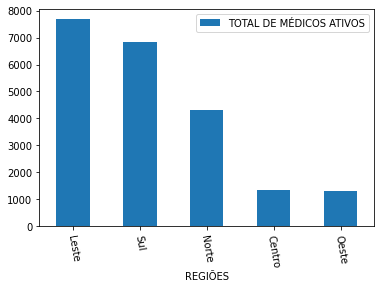

In [ ]:
df_target.plot.bar(x='REGIÕES', y='TOTAL DE MÉDICOS ATIVOS', rot=1000)

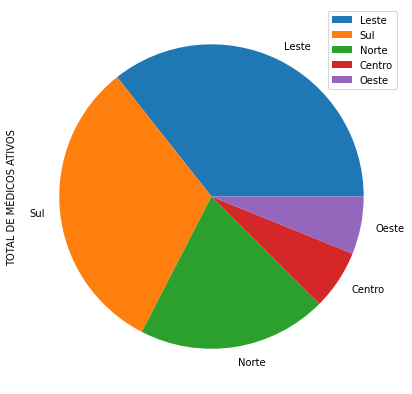

In [ ]:
df_target.plot.pie(y='TOTAL DE MÉDICOS ATIVOS', figsize=(10,7))

**Conforme observado nos dados crus, pelos gráficos também podemos observar que as maiores regiões são Leste e Sul, Leste superando Sul por quase 1000 médicos. Portanto, região Leste é a região escolhida para o alvo da campanha.**